# Bank Marketing Data Set

With access to a comprehensive dataset encompassing various client demographics and financial behaviors within the banking sector, there lies a significant opportunity to enhance marketing strategies. By leveraging the insights derived from this dataset, banks can refine their targeting approaches to better resonate with specific client segments. Analyzing factors such as job type, education level, loan utilization, homeownership status, and default patterns allows for an understanding of customer preferences and needs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [6]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [7]:
df['age'].value_counts().head(15)

31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
29    328
40    326
41    299
42    295
28    292
Name: age, dtype: int64

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [10]:
df['marital']=df['marital'].map({'married': 1, 'single': 0})

In [11]:
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])

In [12]:
df['marital']=df['marital'].astype(int)

In [13]:
df['default']=df['default'].map({'yes': 1, 'no': 0})

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

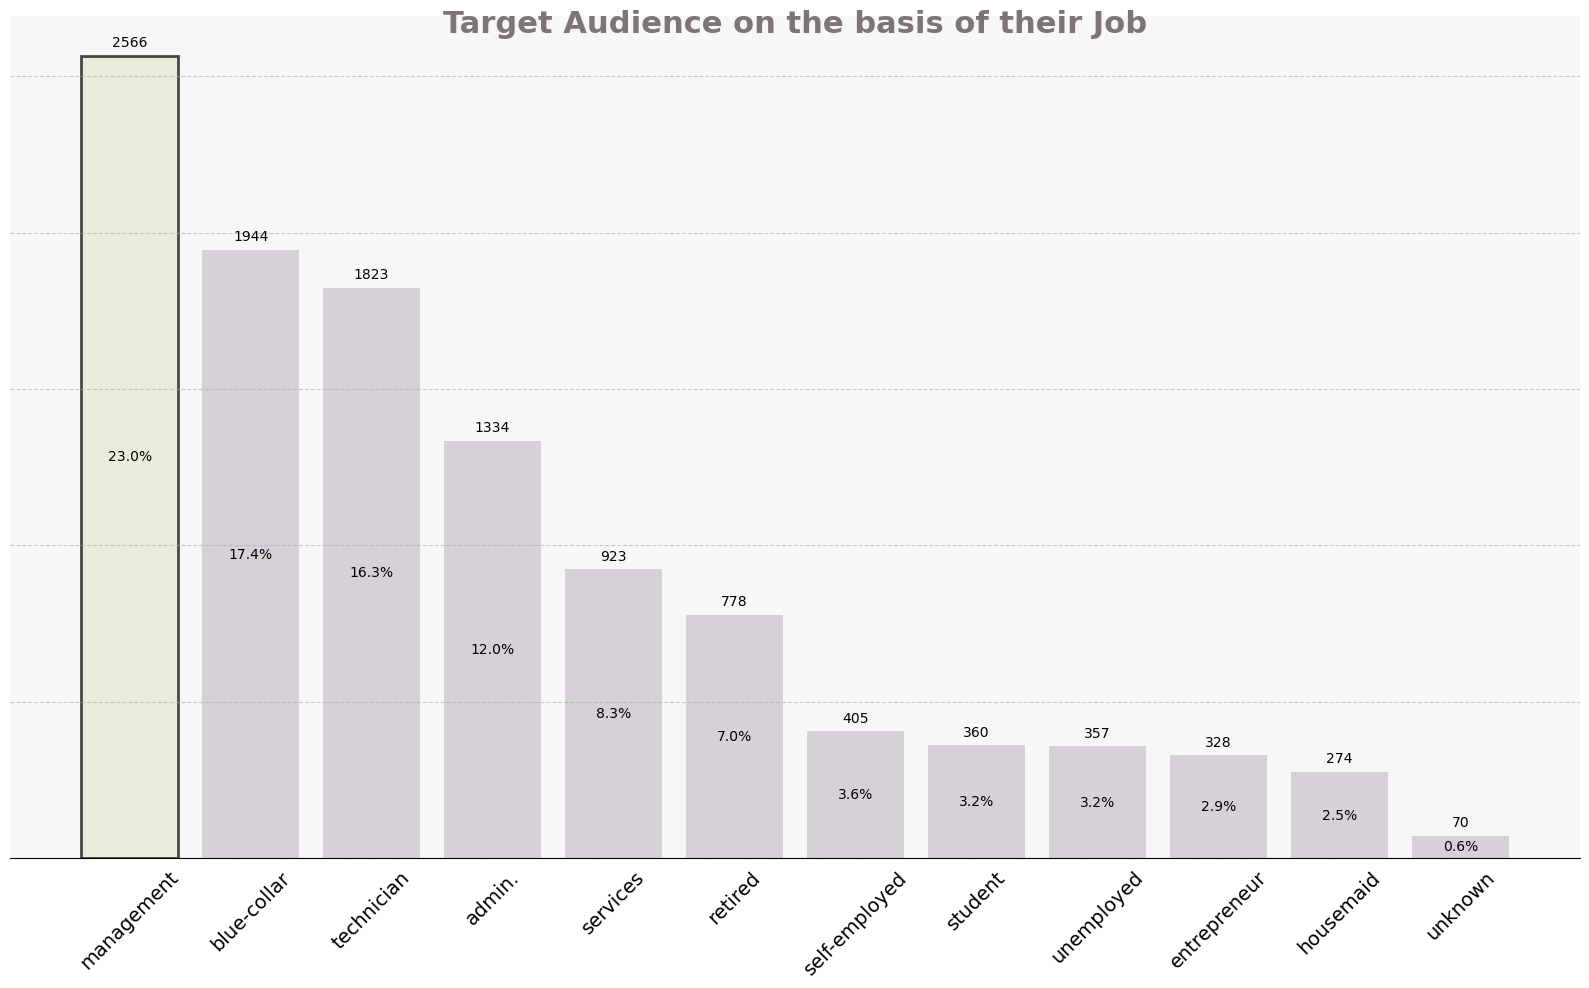

In [16]:
job = df['job'].value_counts().index
cnt = df['job'].value_counts().values
percent = round(df["job"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(16,10))
bars= plt.bar(job, cnt, color="#c9c1c9", alpha = 0.7, linewidth=2)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.65)
plt.grid(axis='x', linestyle=" ")
plt.yticks(range(0,3000,500),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt=job[cnt.argmax()]

max_cnt_index= list(job).index(max_cnt)
bars[max_cnt_index].set_color('#e5e8d1')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.98, "Target Audience on the basis of their Job", horizontalalignment = 'center', fontsize=22, 
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')

for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

Most of the clinets in Bank have Job in Manamgement field, followed by blue-collar field, so bank could make strageties to attrack more clients working in these two fields

In [17]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
df['default'].value_counts()

0    10994
1      168
Name: default, dtype: int64

In [20]:
df_default = df[df['default']==1]
df_default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,32,blue-collar,1,secondary,1,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
114,30,blue-collar,0,secondary,1,239,yes,no,unknown,21,may,412,1,-1,0,unknown,yes
210,42,technician,0,secondary,1,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
213,44,management,1,tertiary,1,-411,yes,no,unknown,2,jun,432,4,-1,0,unknown,yes
216,40,self-employed,1,secondary,1,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,37,self-employed,1,secondary,1,0,yes,no,cellular,17,jul,158,1,-1,0,unknown,no
11053,34,management,0,tertiary,1,621,no,no,cellular,28,aug,205,3,-1,0,unknown,no
11070,31,management,0,tertiary,1,-365,yes,no,unknown,30,may,319,6,-1,0,unknown,no
11126,35,unemployed,1,secondary,1,1054,yes,yes,cellular,21,nov,106,1,-1,0,unknown,no


In [21]:
df_default['marital'].value_counts().index==1

array([ True, False])

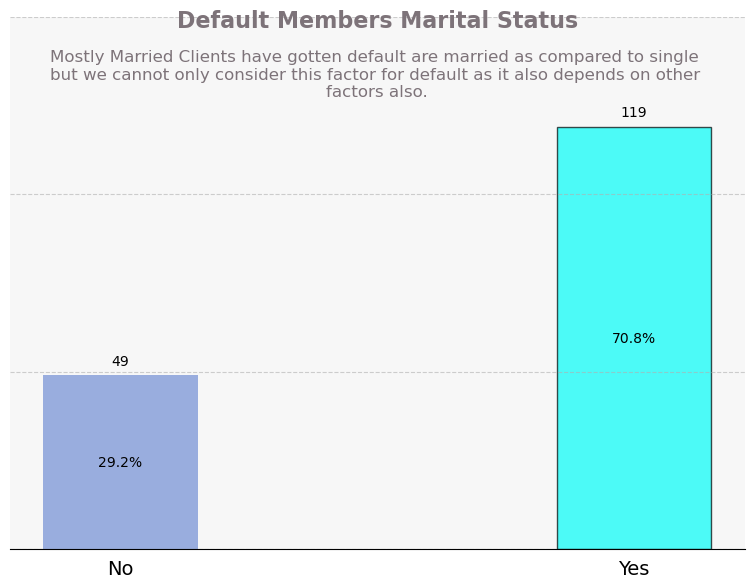

In [22]:
marital= df_default['marital'].value_counts().index

cnt = df_default['marital'].value_counts().values
percent = round(df_default["marital"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(8,6))
bars= plt.bar(marital, cnt, color="#728ed4", alpha = 0.7, linewidth=1, width =0.3)

plt.xticks([0,1],['No','Yes'] ,fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.6)
plt.yticks(range(0,200,50),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

yes_cnt=marital[marital==1]
yes_cnt_in= list(marital).index(yes_cnt)
bars[yes_cnt_in].set_color('#03fcf8')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+2, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.98, "Default Members Marital Status", fontsize=16, horizontalalignment = 'center',
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')
plt.text(0.5, 0.85, 'Mostly Married Clients have gotten default are married as compared to single \nbut we cannot only consider this factor for default as it also depends on other \nfactors also.',
          fontsize=12, horizontalalignment = 'center', transform=plt.gca().transAxes, color='#7d7379')


for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

Most of the clients that have gotten default are Married

In [23]:
df_default['job'].value_counts()

blue-collar      41
management       39
technician       29
admin.           11
entrepreneur     10
self-employed     8
housemaid         8
unemployed        8
services          7
retired           5
unknown           1
student           1
Name: job, dtype: int64

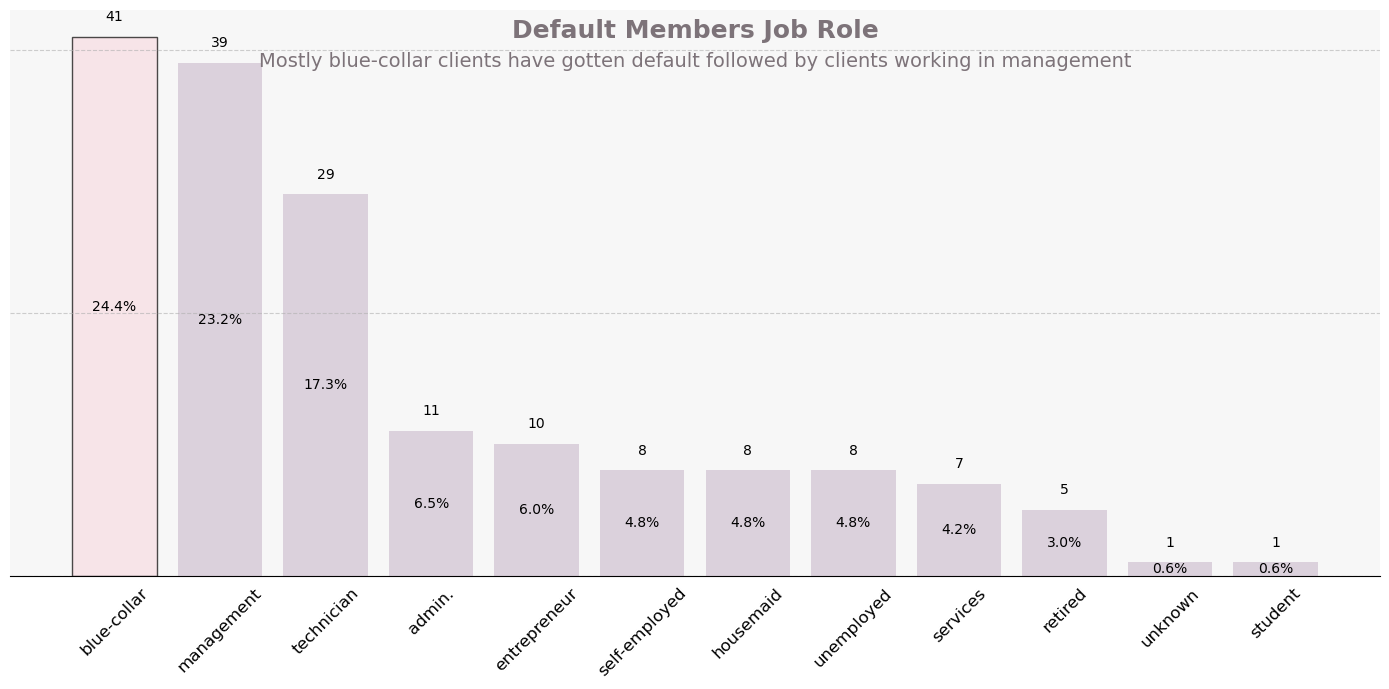

In [24]:
marital= df_default['job'].value_counts().index

cnt = df_default['job'].value_counts().values
percent = round(df_default["job"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(14,7))
bars= plt.bar(marital, cnt, color="#d0c2d1", alpha = 0.7, linewidth=1)

plt.xticks(rotation = 45 ,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.6)
plt.yticks(range(0,60,20),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt=marital[cnt.argmax()]

max_cnt_index= list(marital).index(max_cnt)
bars[max_cnt_index].set_color('#f7dce3')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.95, "Default Members Job Role", fontsize=18, horizontalalignment = 'center',
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')
plt.text(0.5, 0.90, 'Mostly blue-collar clients have gotten default followed by clients working in management',
          fontsize=14, horizontalalignment = 'center', transform=plt.gca().transAxes, color='#7d7379')


for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

Most of the clients that have gotten default are in blue-collar field so bank could make strageties to watch these people more especially while providing loans.

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
df.duplicated().sum()

0

In [27]:
df.dtypes

age           int64
job          object
marital       int32
education    object
default       int64
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

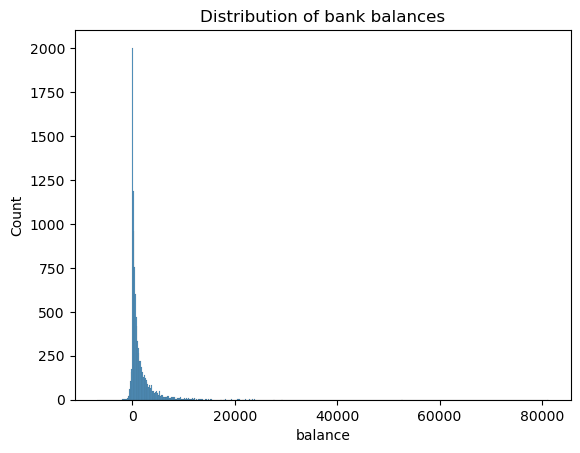

In [28]:
sns.histplot(data=df, x='balance')
plt.title("Distribution of bank balances")
plt.ylabel('Count')
plt.show()

* Most Bank Balance is positive skewed and most clients of bank have balance of around or below 10000

### Applying K-Mean Clustering

In [29]:
df_kmeans = pd.get_dummies(df, drop_first=True)
scaler = MinMaxScaler()
df_kmeans = scaler.fit_transform(df_kmeans)

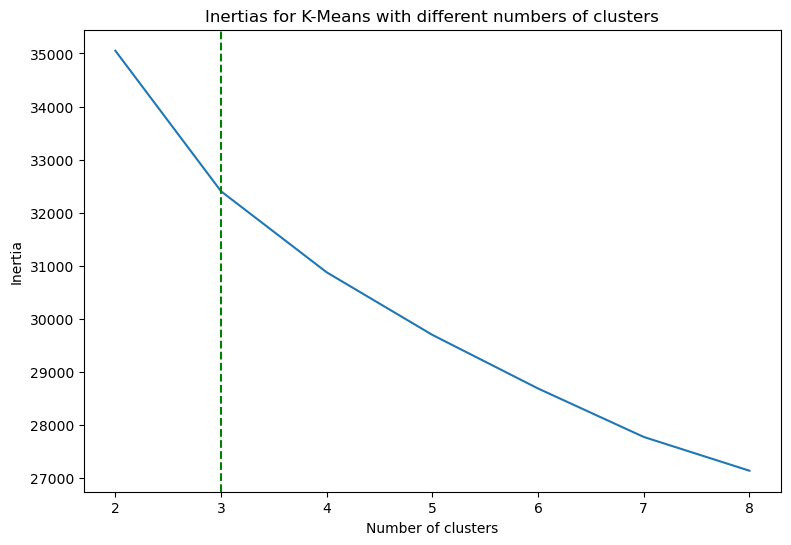

In [30]:
# One-hot encoding and scaling the features:

df_kmeans = pd.get_dummies(df, drop_first=True)
scaler = MinMaxScaler()
df_kmeans = scaler.fit_transform(df_kmeans)
# Running the K-Means algorithm for different numbers of clusters:

n_clusters = list(range(2, 9))
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='random', n_init=10, max_iter=300, random_state=2)
    kmeans.fit(df_kmeans)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plotting the inertia:

plt.figure(figsize=(9, 6))
plt.plot(n_clusters, inertias)
plt.axvline(3, linestyle='--', c='g')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertias for K-Means with different numbers of clusters')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-means'] = kmeans.fit_predict(df_kmeans)

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster_k-means
0,59,admin.,1,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,1,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,1,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,1,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,1,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


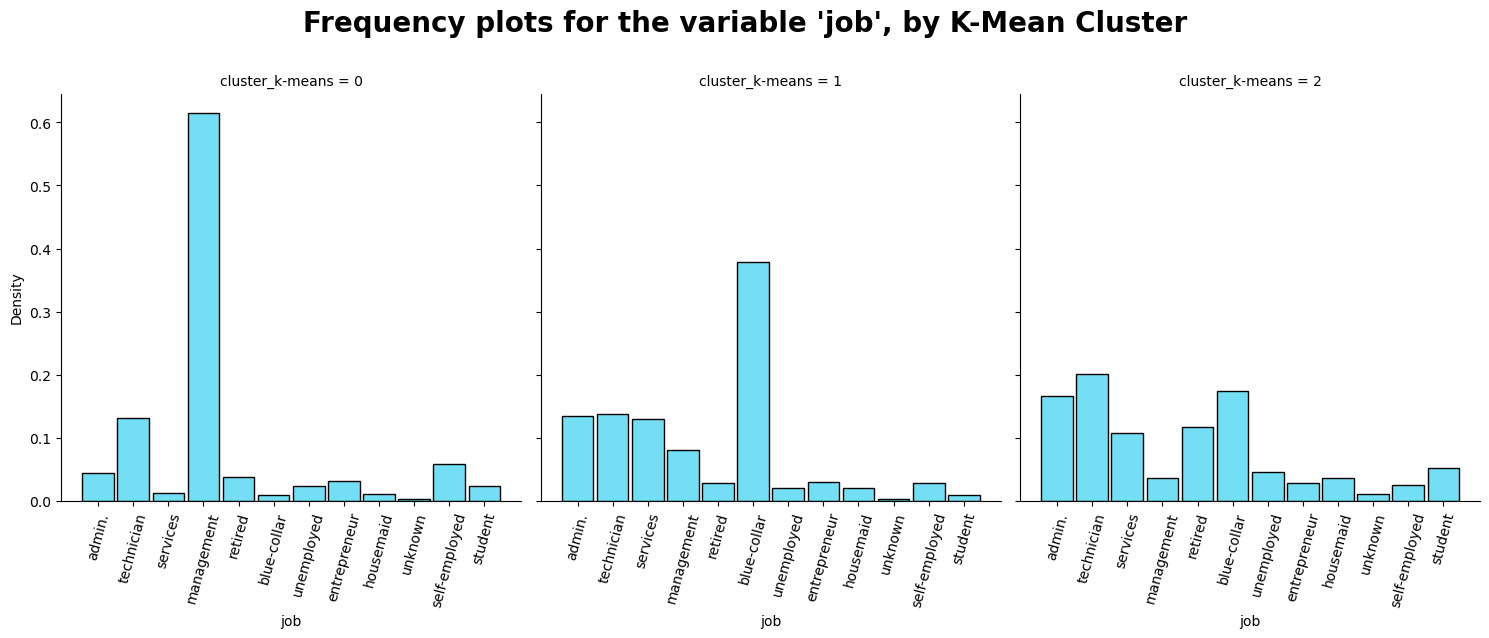

In [33]:
g = sns.displot(data=df, x='job', col='cluster_k-means' ,multiple="dodge", stat='density', shrink=0.9, common_norm=False, color='#46d3f2')
g.set_xticklabels(rotation=75)
g.fig.suptitle("Frequency plots for the variable 'job', by K-Mean Cluster", y=1.1, fontweight = 'bold', fontsize=20)
plt.show()

* Using K-Means Cluster technique, and from above plots we found that at cluster = 0, most clients are from **Managemnt**, at cluster = 1, most clients are from **Technican** while at cluster = 2 most clients are from **Blue-Collar**.  

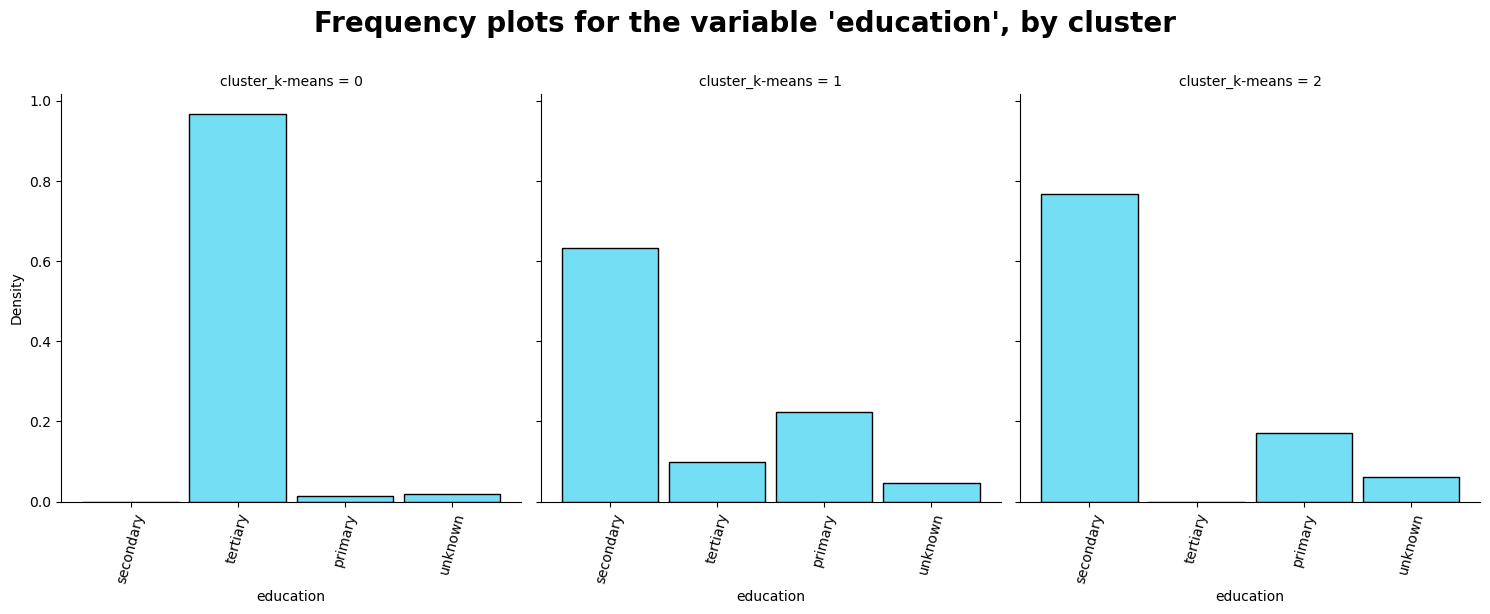

In [34]:
g = sns.displot(data=df, x='education', col='cluster_k-means', multiple="layer", stat='density', shrink=0.9, common_norm=False, color='#46d3f2')
g.set_xticklabels(rotation=75)
g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.1, fontweight = 'bold', fontsize=20)
plt.show()

* On the basis of Education at cluster = 0, most client have **tertiary** education, whereas at cluster = 1 & 2 most clients have **secondary** education. 

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster_k-means
0,59,admin.,1,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,1,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,1,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,1,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,1,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


In [36]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [37]:
round(df['education'].value_counts(normalize = True)*100,1)

secondary    49.1
tertiary     33.0
primary      13.4
unknown       4.5
Name: education, dtype: float64

* Most of the clients have attained **Seconday Education** 

In [38]:
df.shape

(11162, 18)

In [39]:
df_loan = df[df['loan']=='yes']

In [40]:
df_loan

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster_k-means
5,42,management,0,tertiary,0,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,0
6,56,management,1,tertiary,0,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,0
12,29,management,1,tertiary,0,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes,0
19,49,admin.,1,secondary,0,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes,1
40,60,blue-collar,1,primary,0,1262,yes,yes,unknown,13,may,1015,1,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,38,unemployed,1,secondary,0,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no,2
11146,30,admin.,1,secondary,1,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no,2
11154,52,technician,1,tertiary,0,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no,0
11155,35,blue-collar,1,secondary,0,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no,2


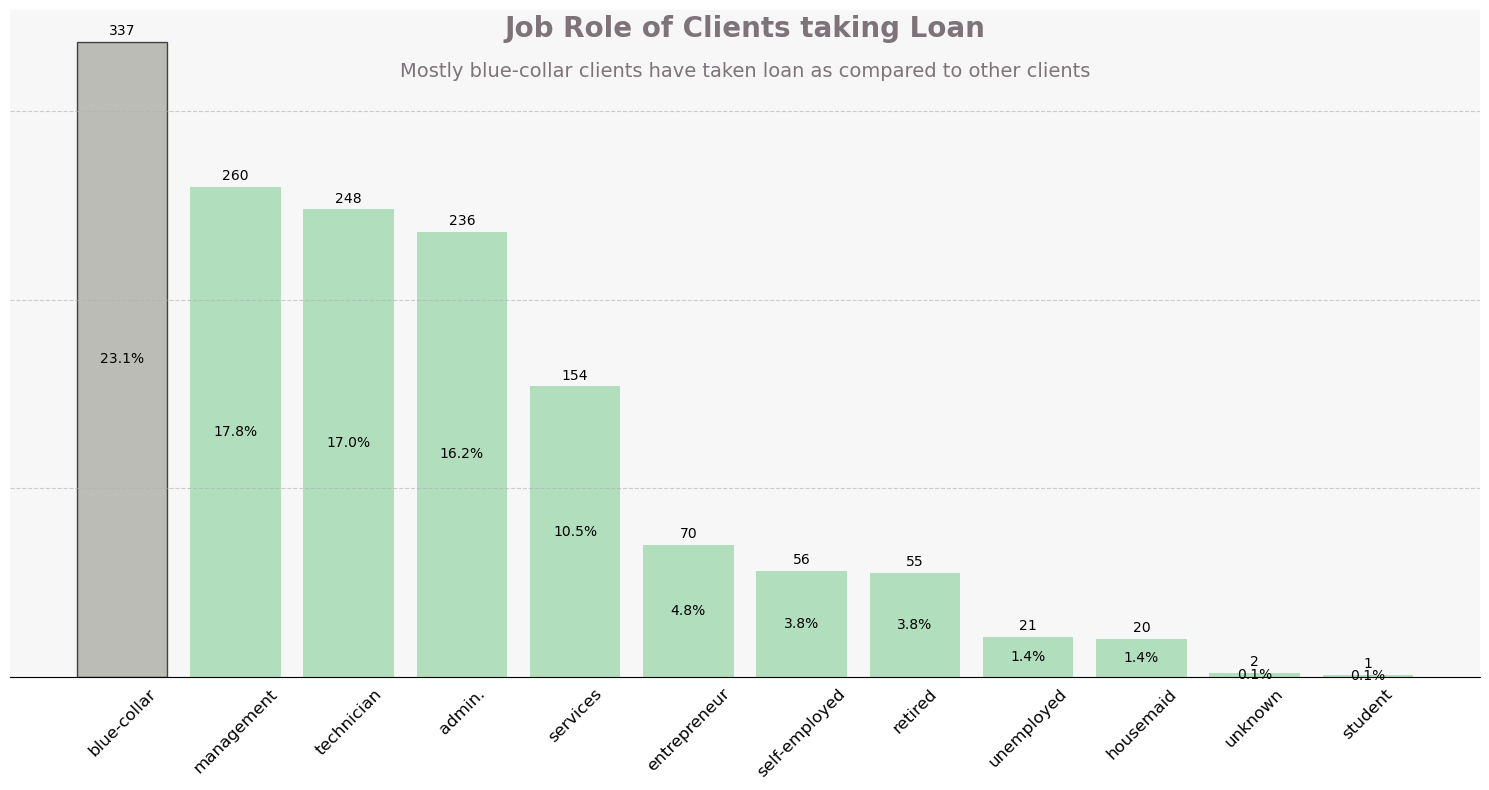

In [41]:
loan= df_loan['job'].value_counts().index

cnt = df_loan['job'].value_counts().values
percent = round(df_loan["job"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(15,8))
bars= plt.bar(loan, cnt, color="#94d6a6", alpha = 0.7, linewidth=1)

plt.xticks(rotation = 45 ,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.6)
plt.yticks(range(0,370,100),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt=loan[cnt.argmax()]

max_cnt_index= list(loan).index(max_cnt)
bars[max_cnt_index].set_color('#a3a39d')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+2, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.96, "Job Role of Clients taking Loan", fontsize=20, horizontalalignment = 'center',
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')
plt.text(0.5, 0.90, 'Mostly blue-collar clients have taken loan as compared to other clients',
          fontsize=14, horizontalalignment = 'center', transform=plt.gca().transAxes, color='#7d7379')


for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

Mostly clients having Blue-Collar jobs inclined in taking loan followed by people in management and Technican so Bank could target these clients.

In [42]:
df_loan['housing'].value_counts()

yes    835
no     625
Name: housing, dtype: int64

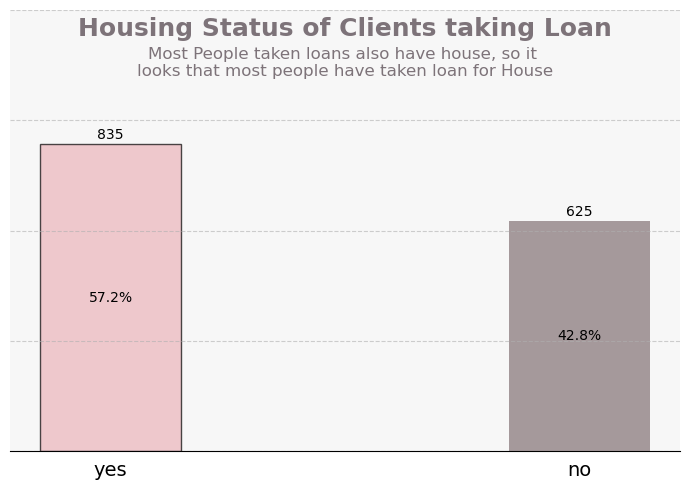

In [43]:
housing= df_loan['housing'].value_counts().index

cnt = df_loan['housing'].value_counts().values
percent = round(df_loan["housing"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(7,5))
bars= plt.bar(housing, cnt, color="#827274", alpha = 0.7, linewidth=1, width =0.3)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.6)
plt.yticks(range(0,1250,300),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

yes_cnt=housing[housing=='yes']
yes_cnt_in= list(housing).index(yes_cnt)
bars[yes_cnt_in].set_color('#ebb5bb')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+6, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')
plt.text(0.5, 0.94, "Housing Status of Clients taking Loan", fontsize=18, horizontalalignment = 'center',
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')
plt.text(0.5, 0.85, 'Most People taken loans also have house, so it \nlooks that most people have taken loan for House',
          fontsize=12, horizontalalignment = 'center', transform=plt.gca().transAxes, color='#7d7379')


for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

* Most clients around 57.2% who have taken loan also owns a house, so after seeing this analysis we could predict that most people have taken loan in order to buy a house.

In [44]:
round(df_loan['marital'].value_counts(normalize=True)*100,1)

1    76.3
0    23.7
Name: marital, dtype: float64

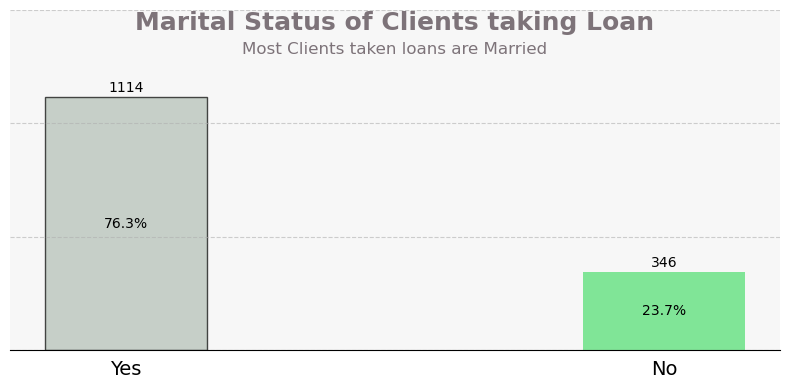

In [45]:
loan_marital= df_loan['marital'].value_counts().index

cnt = df_loan['marital'].value_counts().values
percent = round(df_loan["marital"].value_counts(normalize = True) * 100,1)

plt.figure(figsize=(8,4))
bars= plt.bar(housing, cnt, color="#4ede6f", alpha = 0.7, linewidth=1, width =0.3)

plt.xticks([1,0],['No','Yes'],fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.6)
plt.yticks(range(0,2000,500),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

yes_cnt=loan_marital[loan_marital==1]
yes_cnt_in= list(loan_marital).index(yes_cnt)
bars[yes_cnt_in].set_color('#b2bfb5')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+10, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.94, "Marital Status of Clients taking Loan", fontsize=18, horizontalalignment = 'center',
         transform=plt.gca().transAxes, color='#7d7379', fontweight='bold')
plt.text(0.5, 0.87, 'Most Clients taken loans are Married',
          fontsize=12, horizontalalignment = 'center', transform=plt.gca().transAxes, color='#7d7379')


for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

So Around 76.3% Clients are Married that have taken loan, so we could predict that mostly married people requires loan due to increase in their expenses.

## Conclusion
> * According to our **First Result** following conclusion is drawn: 
The analysis of the provided plot reveals a notable trend: clients with blue-collar jobs are the most inclined to take out loans, followed closely by individuals in management positions and technicians. This insight presents a valuable opportunity for banks to refine their marketing strategies and effectively target these specific client demographics. By recognizing the preferences and behaviors of different occupational groups, financial institutions can tailor their loan offerings to better suit the needs and circumstances of blue-collar workers, managers, and technicians. Implementing targeted marketing campaigns that highlight loan products and services tailored to the financial requirements and preferences of these professions can enhance customer engagement and satisfaction. Moreover, by focusing on these key demographics, banks can optimize their resources and efforts to attract and retain clients who are more likely to utilize their loan services, thereby maximizing business opportunities and fostering long-term relationships with their customer base.

> * According to our **Second Result** following conclusion is drawn:
The analysis of the plot indicates that a significant majority, approximately 57.2%, of clients who have taken out loans also own a house. This observation leads to the inference that a considerable portion of individuals opt for loans with the specific intention of purchasing a house. Consequently, this insight presents an opportunity for banks to refine their targeting strategies by focusing on customers who do not yet own homes. By directing marketing efforts towards this demographic, financial institutions can tailor their loan products and services to cater to the needs and aspirations of individuals seeking to embark on homeownership. Offering specialized loan packages, such as mortgage options with favorable terms and conditions, can attract prospective homeowners and facilitate their journey towards property ownership. Moreover, by addressing the needs of this segment of the market, banks can not only expand their customer base but also play a pivotal role in enabling individuals to fulfill their homeownership dreams.

> * According to our **Third Result** following conclusion is drawn:
Based on the data analysis, it's evident that a significant portion of clients who have availed loans are married individuals. This observation suggests a potential correlation between marital status and the inclination to take out loans. Married clients may indeed exhibit higher expenses and desires driven by family responsibilities, prompting them to seek financial assistance for various purposes. As a result, for marketing strategies, targeting married clients with tailored loan plans could prove advantageous. By offering specialized loan options that cater to the specific needs and circumstances of married individuals, financial institutions can better meet the demands of this demographic and potentially enhance customer satisfaction and loyalty. Thus, understanding the demographic trends and preferences can inform strategic marketing initiatives aimed at maximizing client engagement and satisfaction in the lending sector.






